In [1]:
#importing the neccessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score, roc_curve

In [2]:
# Loading the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

C:\Users\DELL\AppData\Local\Temp\ipykernel_4944\4217477603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


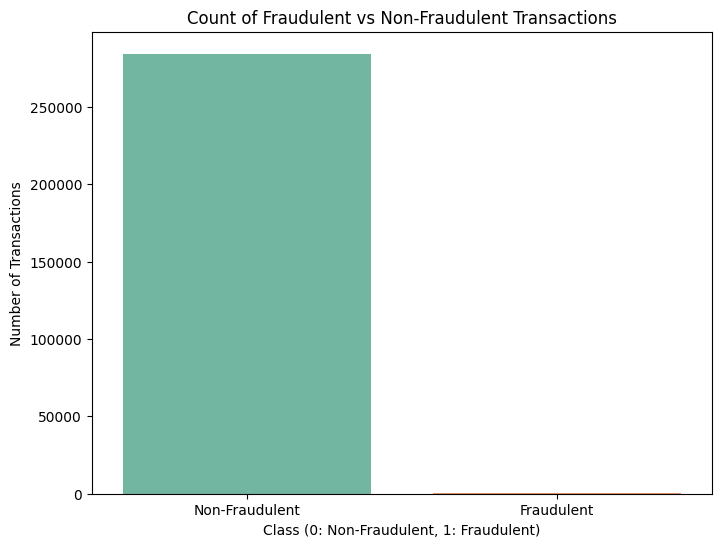

In [6]:
# bar gragh for fraudulent and non-fraudulent data
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Time is not required so drop it
df.drop('Time',axis=1,inplace=True,errors='ignore')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Figure size 2000x1500 with 0 Axes>

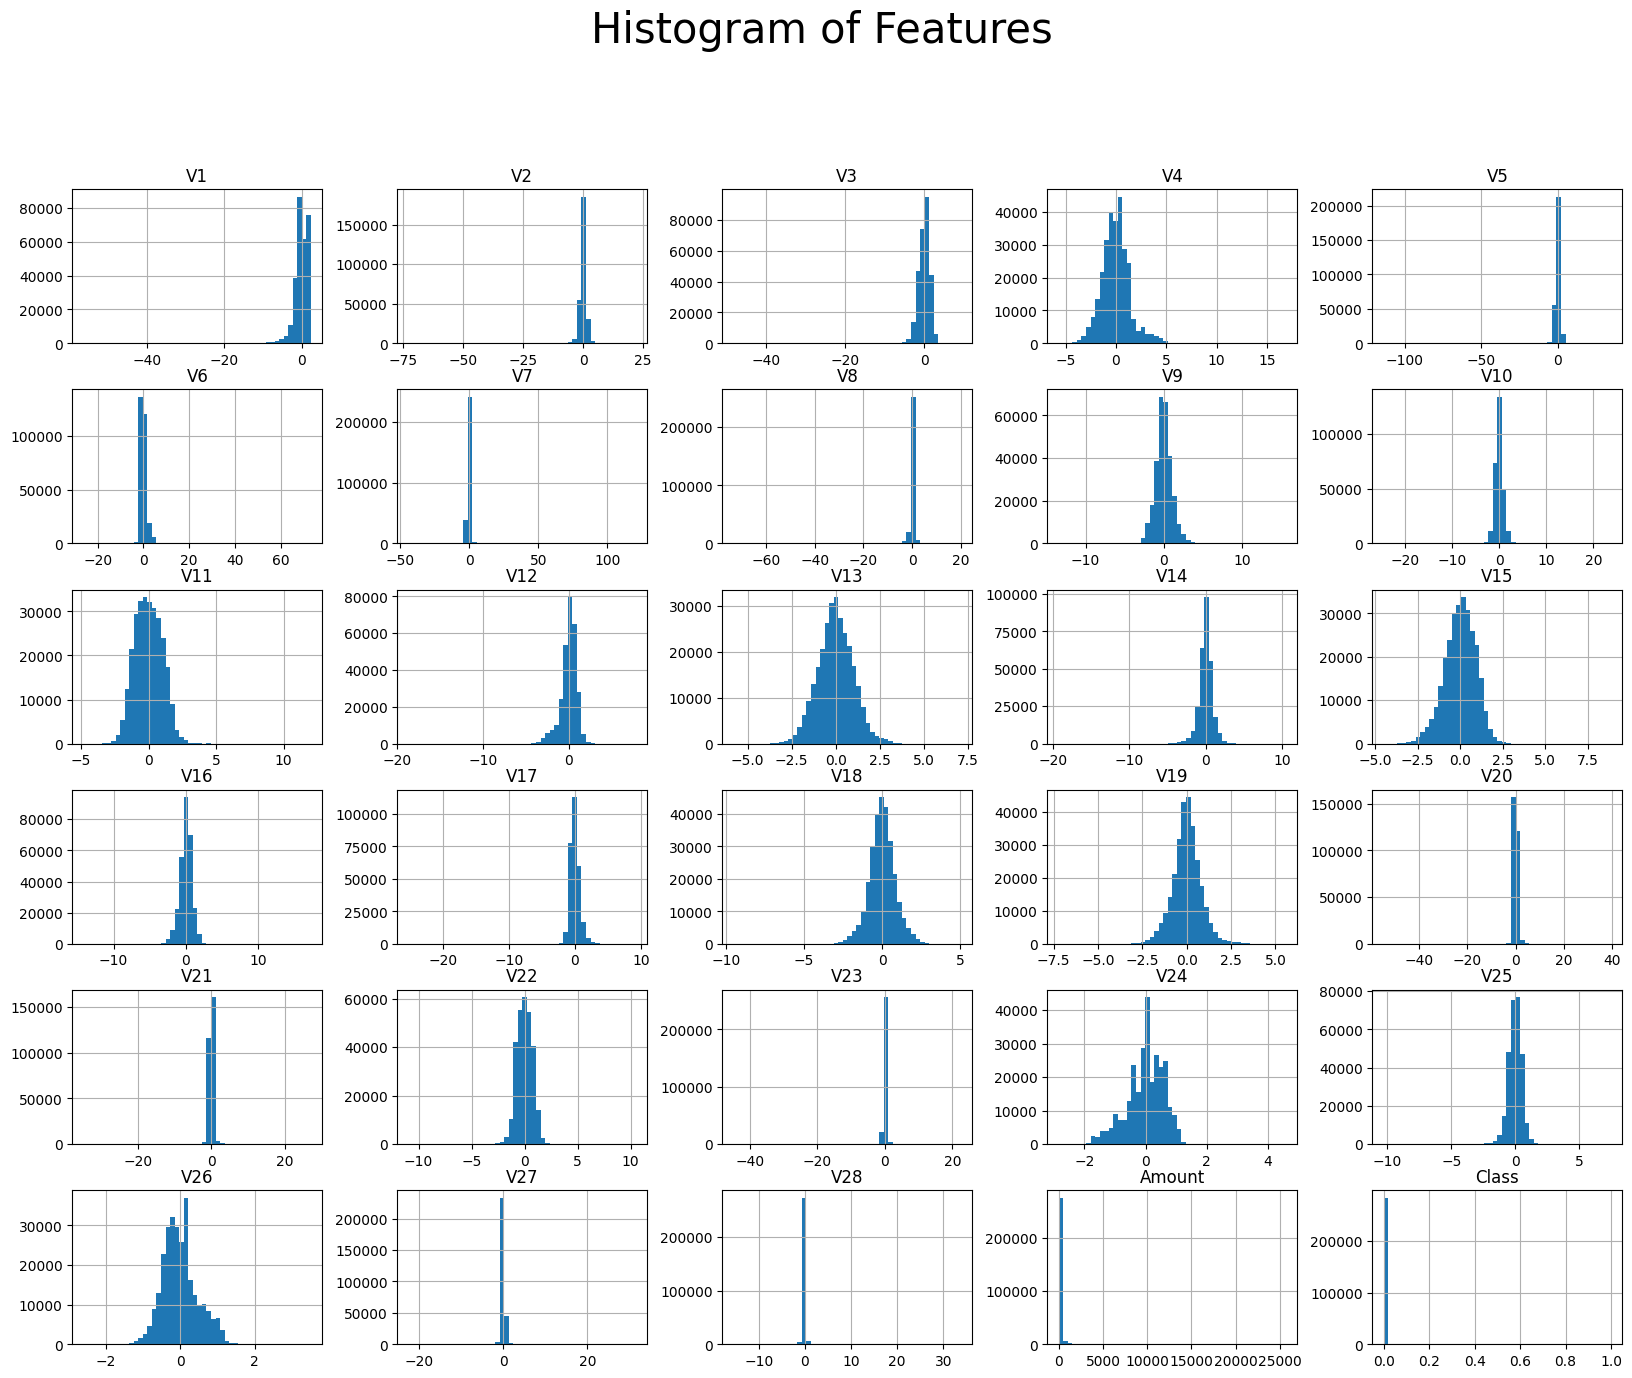

In [9]:
# histogram for all features 
plt.figure(figsize=(20, 15))
df.hist(figsize=(20, 15), bins=50)
plt.suptitle('Histogram of Features', fontsize=30, y=1)  # Adjust fontsize and y-position for better fit
plt.show()

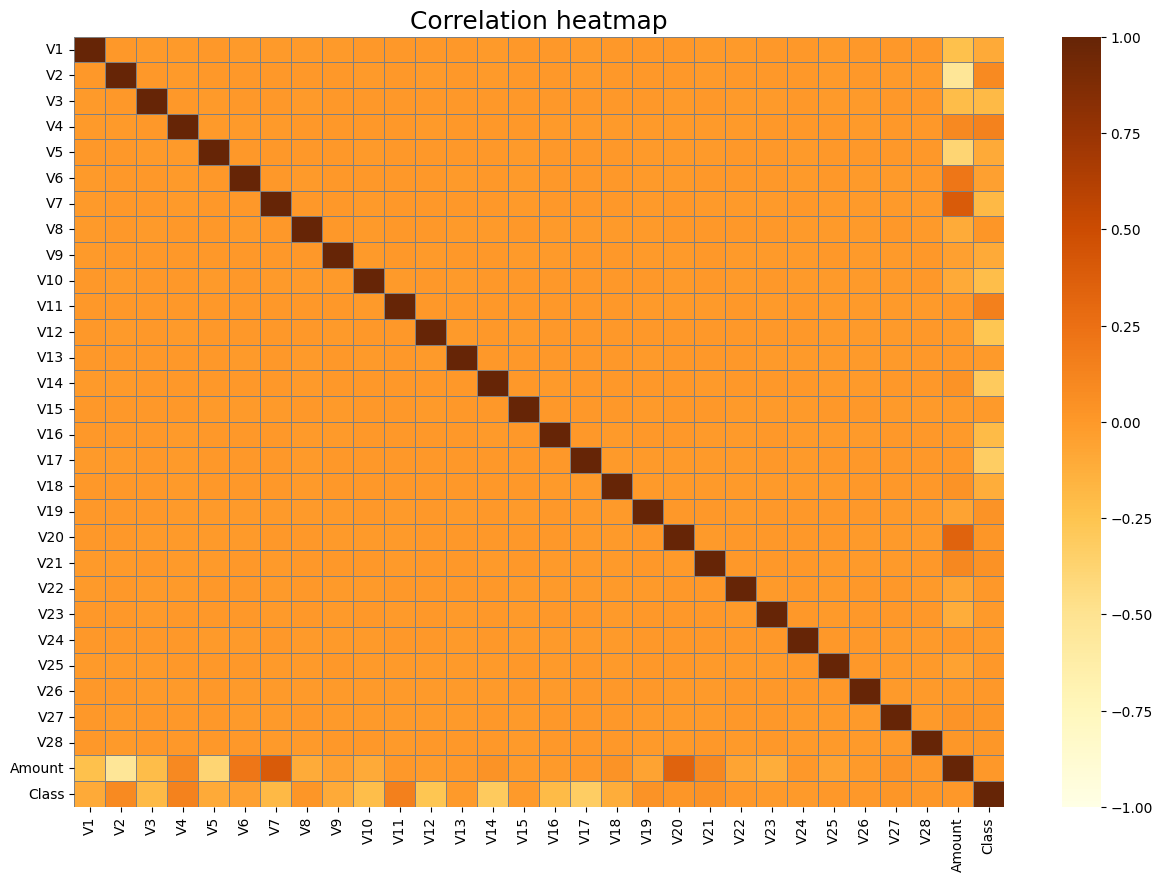

In [10]:
# correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='YlOrBr', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='gray')
plt.title('Correlation heatmap', fontsize=18)
plt.show()

In [11]:
# Seperating features and target variable
# splitting dataset into training and testing sets
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
X_train

array([[ 0.99785119, -0.22962626, -0.20738468, ...,  0.11248883,
        -0.14374055, -0.30788875],
       [-0.205221  , -0.37821992,  1.02754428, ..., -0.92189789,
        -0.43984143, -0.1670264 ],
       [ 0.03655821,  0.49556347, -0.37003324, ...,  0.51372993,
         0.21235767, -0.30004345],
       ...,
       [-0.07533181,  0.59962034,  1.0072428 , ..., -0.3013968 ,
        -0.59571596, -0.33162078],
       [-1.50615534,  1.42172842, -1.66405501, ...,  1.23673372,
         1.01755287, -0.34315338],
       [ 0.62923844, -0.47354037,  0.25598759, ...,  0.00310728,
         0.11623211,  0.0961834 ]])

In [14]:
X_test

array([[ -8.4294878 ,   5.26603668, -12.24733135, ...,  -4.91408171,
         -3.1444534 ,   1.20222813],
       [  0.17523146,  -1.68426209,  -0.09044218, ...,   0.0994836 ,
          0.31109426,   1.88055411],
       [  0.71590036,  -0.36334475,   0.10829367, ...,   0.02746028,
          0.01709468,  -0.24721348],
       ...,
       [  0.02250105,  -0.06826748,  -0.83391485, ...,   0.87078148,
          1.07275263,  -0.34887754],
       [ -0.25069035,   0.60734232,   1.0950939 , ...,   0.09834779,
         -0.81117285,  -0.36645233],
       [ -0.80955191,   0.60791566,  -0.33913205, ...,   0.3057984 ,
         -1.82971929,   3.56055607]])

In [15]:
# using logistic regression to get better and effecient accuracy
logistic_model = LogisticRegression(C=10,random_state=42)
logistic_model.fit(X_train,y_train)

LogisticRegression(C=10, random_state=42)

In [16]:
# Hyperparameter Tuning 
logistic_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
logistic_grid = GridSearchCV(LogisticRegression(random_state=42),logistic_params,cv=5,scoring='accuracy')
logistic_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [17]:
best_logistic_model = logistic_grid.best_estimator_
y_pred_logistic = best_logistic_model.predict(X_test)

Evaluation Metrics

In [18]:
# accuracy for Logistic regression Model
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy)

Accuracy: 0.9991222218320986


In [19]:
# classification report
report = classification_report(y_test, y_pred_logistic)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
# Receiver Operating Characteristic Score
roc_auc = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}\n")

ROC-AUC Score: 0.9762944957104958



<Axes: >

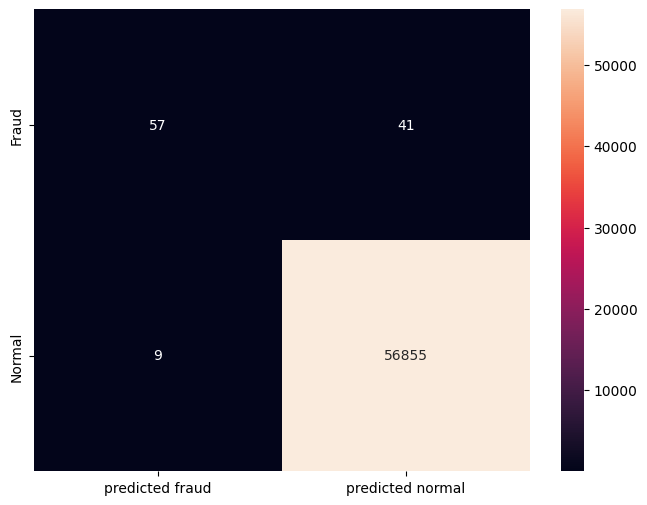

In [21]:
# confusion metrix
cm_logistic = np.array(confusion_matrix(y_test, y_pred_logistic,labels=[1,0]))
plt.figure(figsize=(8, 6))
confusion = pd.DataFrame(cm_logistic, index=['Fraud', 'Normal'],columns=['predicted fraud','predicted normal'])
sns.heatmap(confusion, annot=True,fmt='d')

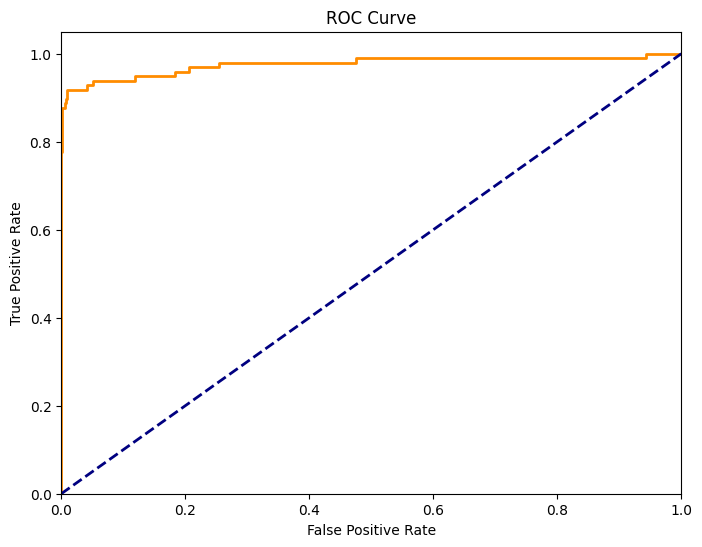

In [22]:
# Receiver Operating Characteristic Curve
fpr, tpr, _ = roc_curve(y_test, best_logistic_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [23]:
y_pred_logistic = best_logistic_model.predict(X_test)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test)[:, 1])
print("\nModel Summary\n")
print("Logistic Regression")
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print(f"ROC-AUC Score: {roc_auc_logistic}\n")


Model Summary

Logistic Regression
Accuracy: 0.9991222218320986
Confusion Matrix:
         predicted fraud  predicted normal
Fraud                57                41
Normal                9             56855
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9762944957104958



In [24]:
# Conclusion
from prettytable import PrettyTable
summary_table = PrettyTable()
summary_table.field_names = ["Model", "Accuracy", "ROC-AUC Score"]
summary_table.add_row(["Logistic Regression", f"{accuracy_logistic:.4f}", f"{roc_auc_logistic:.4f}"])
print(summary_table)

+---------------------+----------+---------------+
|        Model        | Accuracy | ROC-AUC Score |
+---------------------+----------+---------------+
| Logistic Regression |  0.9991  |     0.9763    |
+---------------------+----------+---------------+
